In [1]:
# imports
import control

import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline

from sympy.abc import t, s
from sympy import symbols, simplify
from sympy.series import limit
from sympy import matrices
from sympy.integrals import integrate

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png', 'pdf')

# Problem 10.8

## Part A

Real PD:

 
$G(s) = k_c \left(\frac{1 + \tau_D s}{1 + \alpha \tau_D s}\right)$

$E(s)=\frac{1}{s}$

$U(s)=k_c\left(\frac{1+\tau_Ds}{s\left(1+\alpha\tau_Ds\right)}\right)$

$U(s)=k_c\left(\frac{1}{s}+\frac{\tau_D\left(1-\alpha\right)}{\left(1+\alpha\tau_Ds\right)}\right)$ 

$u(t)=k_c\left(\mathcal{H}(t)+\frac{\tau_D\left(1-\alpha\right)}{\alpha\tau_D}\right)\exp\left(-\alpha^{-1}\frac{t}{\tau_D}\right)$

Real PD response:

$$\boxed{\frac{u(t)}{k_c}=\mathcal{H}(t)+\frac{\left(1-\alpha\right)}{\alpha}\exp\left(-\alpha^{-1}\frac{t}{\tau_D}\right)}$$

Ideal PD:


$G(s)=k_c\left(1+\tau_Ds\right)$

$U(s)=k_c\left(\frac{1}{s}+\tau_D\right)$

Ideal PD response:

$$\boxed{\frac{u(t)}{k_c}=\mathcal{H}(t)+\tau_D\delta\left(t\right)}$$

### Simulation

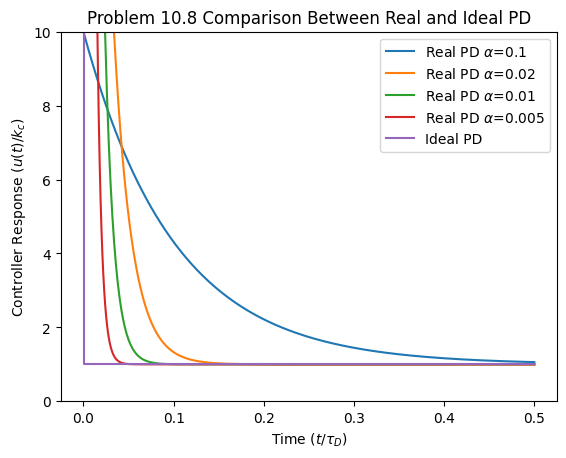

In [2]:
# response simulation
alpha_values = [0.1, 0.02, 0.01, 0.005]

def real_pd(t, alpha):
    return 1 + (1 - alpha) / alpha * np.exp(-t / alpha)

t_values = np.linspace(0, .5, 500)

for a in alpha_values:
    plt.plot(t_values, real_pd(t_values, a), label=fr"Real PD $\alpha$={a}")

ideal_pd_response = np.ones(t_values.shape[0])
ideal_pd_response[0] = 1e300

plt.plot(t_values, ideal_pd_response, label="Ideal PD")

plt.ylim([0, 10])
plt.xlabel(r"Time ($t/\tau_D$)")
plt.ylabel(r"Controller Response ($u(t)/k_c$)")
plt.title("Problem 10.8 Comparison Between Real and Ideal PD")
plt.legend()

The closer that $\alpha$ is to zero, the closer closer that the Real PD is to the Ideal PD. The smaller the $\alpha$ value, the faster that the Real PD reaches the set point.

## Part B

AR and phase as a function of frequency:

Real PD:

$$\frac{\text{AR}}{k_c}=\frac{\sqrt{\left(\tau_D\omega\right)^2+1}}{\sqrt{\alpha^2\left(\tau_D\omega\right)^2+1}}$$

$$\phi=\tan^{-1}\left(\tau_D\omega\right)-\tan^{-1}\left(\alpha\tau_D\omega\right)$$

Ideal PD:

$$\frac{\text{AR}}{k_c}=\sqrt{\left(\tau_D\omega\right)^2+1}$$

$$\phi=\tan^{-1}\left(\tau_D\omega\right)$$

Transfer functions:

Real PD:

$$G(s)=k_c\left(\frac{1+\tau_Ds}{1+\alpha\tau_Ds}\right)$$

Ideal PD:

$$G(s)=k_c\left(1+\tau_Ds\right)$$

### Bode Diagrams

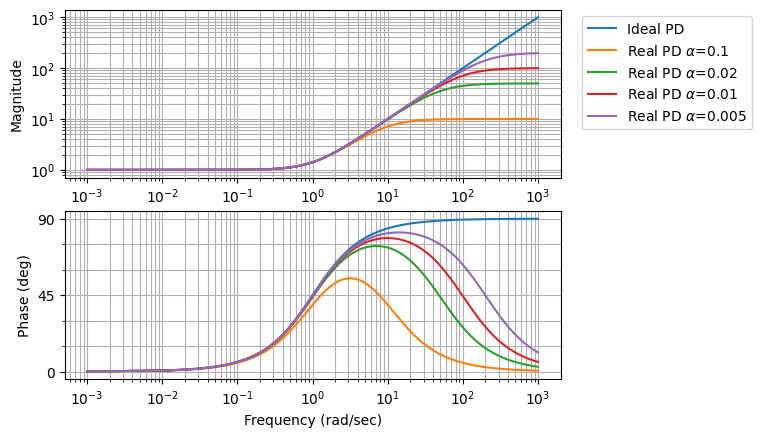

In [3]:
# bode plots
ideal_pd = control.tf([1, 1], [1])

bode_kwargs = {
    'wrap_phase': True,
    'omega': np.linspace(1e-3, 1e3, int(1e5)),
}

control.bode_plot(ideal_pd, **bode_kwargs, label="Ideal PD")

for a in alpha_values:
    real_pd = control.tf([1, 1], [a, 1])
    control.bode_plot(real_pd, **bode_kwargs, label=fr"Real PD $\alpha$={a}")

plt.legend(loc="upper right", bbox_to_anchor=(1.4, 2.2))
plt.show()

In the magnitude plot, the real PD flattens past a $\tau_D\omega$ value of 10, while the ideal PD keeps increasing. As $\alpha$ approaches 0, the real PD begins to approach the same curve as the ideal PD in the magnitue plot. 

In the phase plot, the real PD phase peaks around $\tau_D\omega=10$ and then returns to $0^\circ$. In contrast, the ideal PD starts at $0^\circ$ and steps up to $90^\circ$. As $\alpha$ approaches 0, the real PD begins to approach the same curve as the ideal PD in the phase plot. 

In both the magnitude and phase plots, unless $\alpha=0$ the real PD only approximates the ideal PD over a certain frequency range.

# Problem 10.10

## Part A

$G(s)=k_c\left(1+\frac{1}{\tau_Is}+\frac{\tau_Ds}{\tau_Fs+1}\right)$

$U(s)=k_c\left(E(s)+\frac{1}{\tau_Is}E(s)+\frac{\tau_Ds}{\tau_Fs+1}E(s)\right)$

$\frac{de_I}{dt}=e$

$sE_I=E$

First order filter in front of derivative.

$\tau_F\frac{de_F}{dt}+e_F=e$

$E_F=\frac{E}{\tau_Fs+1}$

$\mathcal{L}^{-1}\left\{U(s)\right\}=\mathcal{L}^{-1}\left\{k_c\left(E(s)+\frac{E_I}{\tau_I}+\tau_DsE_F\right)\right\}$

$u(t)=k_c\left(e+\frac{e_I}{\tau_I}+\tau_D\frac{de_F}{dt}\right)$

### State space models:

$$\frac{de_I}{dt}=e$$

$$\frac{de_F}{dt}=\frac{e-e_F}{\tau_F}$$

$$u=k_c\left(e+\frac{e_I}{\tau_I}+\frac{\tau_D}{\tau_F}\left(e-e_F\right)\right)$$

## Part B

$$\frac{d}{dt}\begin{bmatrix}e_I\\ e_F\end{bmatrix}=\begin{bmatrix}0&0\\0&\frac{-1}{\tau_F}\end{bmatrix}\begin{bmatrix}e_I\\ e_F\end{bmatrix}+\begin{bmatrix}1\\\frac{1}{\tau_F}\end{bmatrix}e$$

$$u=\begin{bmatrix}\frac{k_c}{\tau_I}&-k_c\frac{\tau_D}{\tau_F}\end{bmatrix}\begin{bmatrix}e_I\\ e_F\end{bmatrix}+k_c\left(1+\frac{\tau_D}{\tau_F}\right)e$$

### Define the state-space system in matrix form

In [4]:
# state space matrices
tau_F, tau_I, k_c, tau_D, T_s = symbols('tau_F, tau_I, k_c, tau_D, T_s')

A = matrices.Matrix([
    [0, 0],
    [0, -1/tau_F]
])
B = matrices.Matrix([
    [1],
    [1/tau_F]
])
C = matrices.Matrix([
    [k_c/tau_I, -k_c*tau_D/tau_F]
])
D = k_c * (1 + tau_D/tau_F)

### Compute $A_d$ symbolically

$$A_d=e^{AT_s}$$

In [5]:
# compute A_d
A_d = (A * T_s).exp()
A_d

Matrix([
[1,               0],
[0, exp(-T_s/tau_F)]])

### Compute $B_d$ symbolically

$$B_d=\int_0^{T_s}e^{At'}Bdt'$$

In [6]:
# compute B_d
B_d = integrate((A*t).exp() * B, (t, 0, T_s))
B_d

Matrix([
[                T_s],
[1 - exp(-T_s/tau_F)]])

Discretization:

$$\boxed{A_d=\left[\begin{matrix}1&0\\0&e^{-\frac{T_{s}}{\tau_{F}}}\end{matrix}\right]}$$

$$\boxed{B_d=\left[\begin{matrix}T_{s}\\1-e^{-\frac{T_{s}}{\tau_{F}}}\end{matrix}\right]}$$

# Problem 11.2

## Part A

$Y=AG+WG'$

$B=Y-AM$

$E=Y_{sp}-B$

$E=Y_{sp}+AM-Y$

$A=QE$

$A=QY_{sp}+AMQ-QY$

$A(1-MQ)=QY_{sp}-QY$

$Y(1-MQ)=GQY_{sp}-GQY+W(1-MQ)G'$

$Y(1-MQ+GQ)=GQY_{sp}+W(1-MQ)G'$

$$\boxed{Y=\frac{GQ}{1-MQ+GQ}Y_{sp}+\frac{G'(1-MQ)}{1-MQ+GQ}W}$$

## Part B

$Y=AG+WG'$

$A=C_EE-C_YY$

$E=Y_{sp}-Y$

$A=C_EY_{sp}-C_EY-C_YY$

$Y=GC_EY_{sp}-GC_EY-GC_YY+WG'$

$Y(1+GC_E+GC_Y)=GC_EY_{sp}+WG'$

$$\boxed{Y=\frac{C_EG}{1+C_EG+C_YG}Y_{sp}+\frac{G'}{1+C_EG+C_YG}W}$$

## Part C

$Y=AG+G'W$

$A=EG_c+G_{ff}W$

$Y=EG_cG+G_{ff}GW+G'W$

$E=Y_{sp}-Y$

$Y=Y_{sp}G_cG-YG_cG+G_{ff}GW+G'W$

$Y(1+G_cG)=Y_{sp}G_cG+G_{ff}GW+G'W$

$$\boxed{Y=\frac{GG_c}{1+GG_c}Y_{sp}+\frac{GG_{ff}+G'}{1+GG_c}W}$$

# Problem 11.8

## Part A

Feedback loop transfer function:

$$G(s)=\frac{G_cG_p}{1+G_cG_p}$$

Process transfer function:

$$G_p(s)=\frac{k_p}{\tau^2s^2+2\zeta\tau s+1}$$

Controller transfer function:

$$G_c(s)=k_c\left(\frac{1+\tau_Ds}{1+\alpha\tau_Ds}\right)$$

### Define feedback transfer function symbolically

In [7]:
# define feedback transfer function
tau, zeta, tau_D, alpha = symbols('tau, zeta, tau_D, alpha')
k_c, k_p = symbols('k_c, k_p')

G_p = k_p / (tau**2 * s**2 + 2 * zeta * tau * s + 1)
G_c = k_c * (1 + tau_D * s) / (1 + alpha * tau_D * s)

G_feedback = simplify(G_c * G_p / (1 + G_c * G_p))

(G_feedback)

k_c*k_p*(s*tau_D + 1)/(k_c*k_p*(s*tau_D + 1) + (alpha*s*tau_D + 1)*(s**2*tau**2 + 2*s*tau*zeta + 1))

Feedback transfer function:

$$\boxed{G(s)=\frac{k_{c}k_{p}\left(s\tau_{D}+1\right)}{k_{c}k_{p}\left(s\tau_{D}+1\right)+\left(\alpha s\tau_{D}+1\right)\left(s^{2}\tau^{2}+2s\tau\zeta+1\right)}}$$

## Part B

Find offset by Final Value Theorem:

$$\lim_{s\rightarrow0^+}sY(s)=\lim_{t\rightarrow\infty}y(t)$$

$G(s)=\frac{G_cG_p}{1+G_cG_p}$

$Y(s)=G(s)Y_{sp}(s)$

In deviation form:

$y_{sp}(t)=\mathcal{H}(t)$

$Y_{sp}(s)=\frac{1}{s}$

$Y(s)=\frac{G(s)}{s}$

$sY(s)=s\frac{G(s)}{s}=G(s)$

Offset is $y_{sp}(t)-y(t)$ at $\infty$

$y(t)=\lim_{s\rightarrow0^+}G(s)$

Offset: 

$$1-\lim_{s\rightarrow0^+}G(s)$$

In [8]:
# evaluate offset
simplify(1 - limit(G_feedback, s, 0))

1/(k_c*k_p + 1)

Offset:

$$\boxed{\text{offset}=\frac{1}{k_{c}k_{p}+1}}$$